1. Consider the two dimensional data matrix [(2, 1), (3, 4), (5, 0), (7, 6), (9, 2)].
Implement principal component analysis. Use this to obtain the feature in transformed
2D feature space. Plot the scatter plot of data points in both the original as well as
transformed domain.

In [1]:
import pandas as pd
import numpy as np

In [2]:
Data=[(2, 1), (3, 4), (5, 0), (7, 6), (9, 2)]

In [21]:
X=pd.DataFrame(Data)

Step 1: Standardize the data

In [22]:
def Mean(x):
    return sum(x)/len(x)  

def std(x):
    return (sum((i - Mean(x))**2 for i in x)/len(x))**0.5

def Standardize_data(X):
    return (X - Mean(X))/std(X)

In [23]:
std_data=Standardize_data(X)

Step 2: Covariance matrix

In [24]:
def Covaraince_matrix(x):
    return np.cov(x)

In [25]:
cov_mat=Covaraince_matrix(std_data)

Step 3: Calculating Eigen values and Eigen Vectors

In [30]:
from numpy.linalg import eig

eig_vals, eig_vecs = eig(cov_mat) 
print('Eigenvalues \n', eig_vals)
print('Eigenvectors \n', eig_vecs)

Eigenvalues 
 [ 0.00000000e+00+0.00000000e+00j  2.83088235e+02+0.00000000e+00j
 -3.54395346e-15+5.55477659e-15j -3.54395346e-15-5.55477659e-15j
  1.53181589e-16+0.00000000e+00j]
Eigenvectors 
 [[-0.99348527+0.j         -0.11396058+0.j         -0.03910449+0.01919003j
  -0.03910449-0.01919003j  0.9377436 +0.j        ]
 [-0.01307217+0.j          0.11396058+0.j          0.00420892+0.15644659j
   0.00420892-0.15644659j  0.00478851+0.j        ]
 [ 0.06536087+0.j         -0.56980288+0.j          0.79664989+0.j
   0.79664989-0.j         -0.04383424+0.j        ]
 [ 0.01307217+0.j         -0.11396058+0.j          0.05927231+0.0949057j
   0.05927231-0.0949057j  -0.34036272+0.j        ]
 [ 0.09150522+0.j         -0.79772404+0.j         -0.57131548+0.00605012j
  -0.57131548-0.00605012j -0.05334588+0.j        ]]


Step 4: Rearrange the eigenvectors and eigenvalues

In [32]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# For further usage
eig_vals_sorted = np.array([x[0] for x in eig_pairs])
eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

print(eig_pairs)

[(283.08823529411757, array([-0.01307217+0.j        ,  0.11396058+0.j        ,
        0.00420892+0.15644659j,  0.00420892-0.15644659j,
        0.00478851+0.j        ])), (6.5890173070519736e-15, array([ 0.06536087+0.j, -0.56980288+0.j,  0.79664989+0.j,  0.79664989-0.j,
       -0.04383424+0.j])), (6.5890173070519736e-15, array([ 0.01307217+0.j       , -0.11396058+0.j       ,
        0.05927231+0.0949057j,  0.05927231-0.0949057j,
       -0.34036272+0.j       ])), (1.5318158876128087e-16, array([ 0.09150522+0.j        , -0.79772404+0.j        ,
       -0.57131548+0.00605012j, -0.57131548-0.00605012j,
       -0.05334588+0.j        ])), (0.0, array([-0.99348527+0.j        , -0.11396058+0.j        ,
       -0.03910449+0.01919003j, -0.03910449-0.01919003j,
        0.9377436 +0.j        ]))]


Step 5: Generating PCA

In [33]:
k=3
W = eig_vecs_sorted[:k, :] # Projection matrix

In [35]:
W.shape

(3, 5)

6. Transform the Data

In [36]:
D_Transformed=np.dot(eig_vecs_sorted.transpose(),std_data)

In [37]:
D_Transformed

array([[-21.41702324+0.j        ,  -2.77194839+0.j        ],
       [-22.68199462+0.j        , -18.66474762+0.j        ],
       [ -4.6270234 +2.56836001j,  -0.99038408+0.47672883j],
       [ -4.6270234 -2.56836001j,  -0.99038408-0.47672883j],
       [ 16.65357243+0.j        ,   3.48136943+0.j        ]])

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\91868\anaconda3\lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Text(0.5, 1.0, 'Transformed Domain Scatterplot')

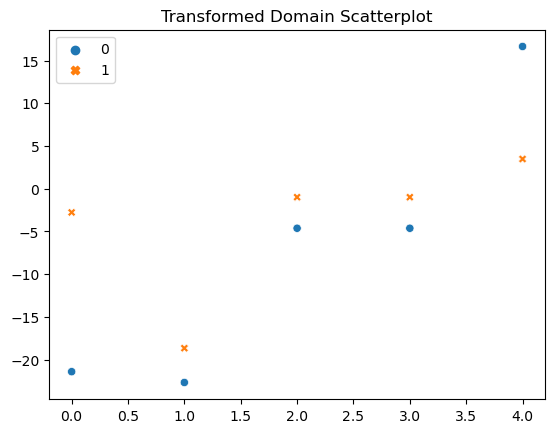

In [50]:
sns.scatterplot(D_Transformed)
plt.title("Transformed Domain Scatterplot")

Text(0.5, 1.0, 'Original Domain Scatterplot')

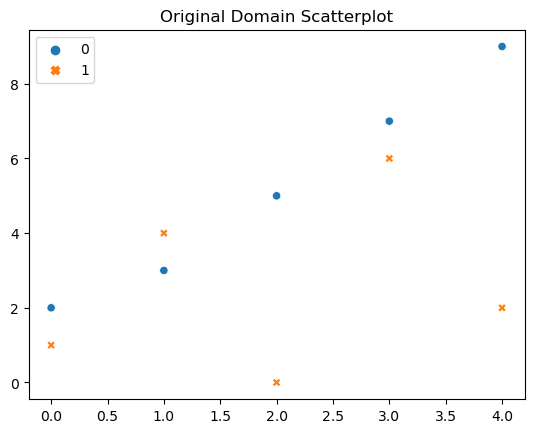

In [51]:
sns.scatterplot(Data)
plt.title("Original Domain Scatterplot")

2. Implement Principal Component Analysis Algorithm and use it to reduce dimensions
of Iris Dataset (from 4D to 2D). Plot the scatter plot for samples in the transformed
domain with different colour codes for samples belonging to different classes.

In [63]:
import sklearn

In [64]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df=pd.read_csv(url,names=['sepal length','sepal width','petal length','petal width','target'])

In [65]:
df.head(5)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values

In [76]:
y = df.loc[:,['target']].values

In [79]:
std_dt=Standardize_data(x)

In [80]:
Covaraince_matrix(std_dt)

array([[ 1.26935536,  0.64987728,  0.94166734, ..., -0.57458312,
        -0.14548004, -0.43589371],
       [ 0.64987728,  0.33302068,  0.4849735 , ..., -0.29401609,
        -0.06772633, -0.21867228],
       [ 0.94166734,  0.4849735 ,  0.72674568, ..., -0.42778472,
        -0.04608618, -0.27836438],
       ...,
       [-0.57458312, -0.29401609, -0.42778472, ...,  0.2708685 ,
         0.0786054 ,  0.19208669],
       [-0.14548004, -0.06772633, -0.04608618, ...,  0.0786054 ,
         0.17668562,  0.14455133],
       [-0.43589371, -0.21867228, -0.27836438, ...,  0.19208669,
         0.14455133,  0.22229033]])

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [81]:
cov_mat=Covaraince_matrix(std_dt)

In [83]:
eig_vals, eig_vecs = eig(cov_mat) 
print('Eigenvalues \n', eig_vals)

Eigenvalues 
 [ 9.57940441e+01+0.00000000e+00j  8.74943162e+00+0.00000000e+00j
  1.30563800e+00+0.00000000e+00j  1.71303255e-14+0.00000000e+00j
 -2.11166588e-15+9.13887018e-15j -2.11166588e-15-9.13887018e-15j
  7.31705801e-15+1.22173879e-15j  7.31705801e-15-1.22173879e-15j
 -5.59606369e-15+4.01353827e-15j -5.59606369e-15-4.01353827e-15j
 -6.33327234e-15+1.35590202e-15j -6.33327234e-15-1.35590202e-15j
 -2.98049383e-15+5.10193618e-15j -2.98049383e-15-5.10193618e-15j
  3.18160428e-16+5.64944646e-15j  3.18160428e-16-5.64944646e-15j
  4.80251201e-15+0.00000000e+00j -4.82571162e-15+0.00000000e+00j
  4.32804890e-15+8.28132950e-16j  4.32804890e-15-8.28132950e-16j
  3.93596586e-15+1.89296434e-15j  3.93596586e-15-1.89296434e-15j
  2.18969680e-15+3.94721618e-15j  2.18969680e-15-3.94721618e-15j
 -2.11742793e-15+3.76920580e-15j -2.11742793e-15-3.76920580e-15j
  1.45535842e-15+3.85207471e-15j  1.45535842e-15-3.85207471e-15j
 -3.03532656e-15+2.14906428e-15j -3.03532656e-15-2.14906428e-15j
 -3.2530366

In [84]:
print('Eigenvectors \n', eig_vecs)

Eigenvectors 
 [[ 1.14958630e-01+0.j  1.96835358e-02+0.j  6.56747493e-04+0.j ...
  -2.40282726e-03+0.j -2.18621270e-03+0.j  3.00101334e-04+0.j]
 [ 5.89472154e-02+0.j  4.24104710e-03+0.j -6.96105509e-04+0.j ...
   1.71333543e-03+0.j  1.55887846e-03+0.j -2.13987188e-04+0.j]
 [ 8.61616944e-02+0.j -4.17453961e-02+0.j  1.61088904e-02+0.j ...
  -2.22150072e-04+0.j -2.02123272e-04+0.j  2.77454539e-05+0.j]
 ...
 [-5.20196694e-02+0.j -9.55787757e-03+0.j -9.11435139e-02+0.j ...
  -2.03844736e-02+0.j -1.85468160e-02+0.j  2.54592073e-03+0.j]
 [-1.11457711e-02+0.j -1.31529336e-01+0.j -1.01384538e-01+0.j ...
   1.45993907e-02+0.j  1.32832576e-02+0.j -1.82339226e-03+0.j]
 [-3.80877530e-02+0.j -9.58032006e-02+0.j  4.80911442e-02+0.j ...
  -3.54848231e-02+0.j -3.22858709e-02+0.j  4.43188028e-03+0.j]]


In [85]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# For further usage
eig_vals_sorted = np.array([x[0] for x in eig_pairs])
eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

print(eig_pairs)

[(95.79404408618333, array([ 0.11495863+0.j        ,  0.01968354+0.j        ,
        0.00065675+0.j        ,  0.00655572+0.j        ,
       -0.04662961-0.01552442j, -0.04662961+0.01552442j,
       -0.07219579+0.063627j  , -0.07219579-0.063627j  ,
       -0.05668328-0.03091626j, -0.05668328+0.03091626j,
        0.04441129-0.04437391j,  0.04441129+0.04437391j,
       -0.03062577+0.1080292j , -0.03062577-0.1080292j ,
       -0.10247276+0.01520919j, -0.10247276-0.01520919j,
        0.24564832+0.j        , -0.04958114+0.j        ,
       -0.06370459+0.06414188j, -0.06370459-0.06414188j,
       -0.07354826-0.08447915j, -0.07354826+0.08447915j,
        0.05369851+0.0258031j ,  0.05369851-0.0258031j ,
        0.00998498-0.02160591j,  0.00998498+0.02160591j,
        0.21800902+0.j        ,  0.21800902-0.j        ,
        0.00383342-0.04314381j,  0.00383342+0.04314381j,
       -0.01226916-0.0026194j , -0.01226916+0.0026194j ,
        0.1857477 +0.02351286j,  0.1857477 -0.02351286j,
        0.

In [98]:
k=2
W = eig_vecs_sorted[:k, :] # Projection matrix

In [99]:
W.shape

(2, 150)

In [120]:
D_Transformed=np.dot(eig_vecs_sorted.transpose(),std_dt)

C:\Users\91868\anaconda3\lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


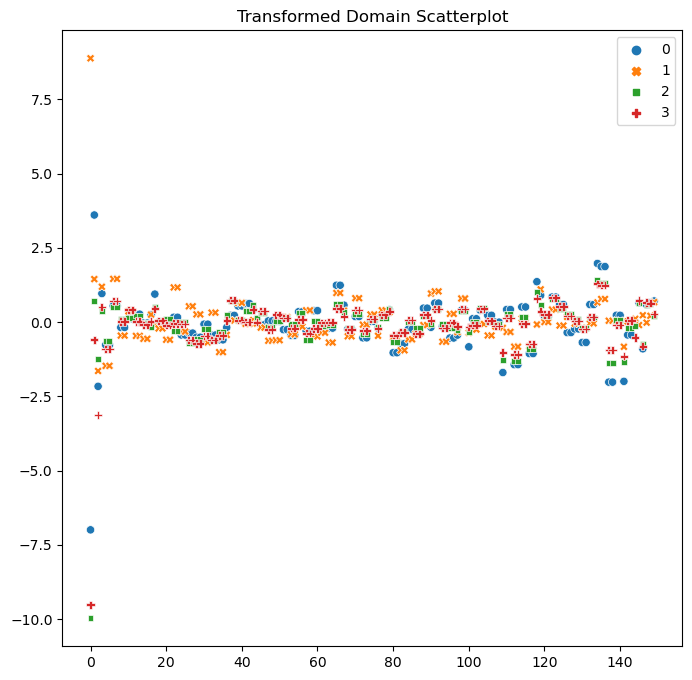

In [117]:
fig = plt.figure(figsize = (8,8))
sns.scatterplot(D_Transformed)
plt.title("Transformed Domain Scatterplot")
plt.legend()

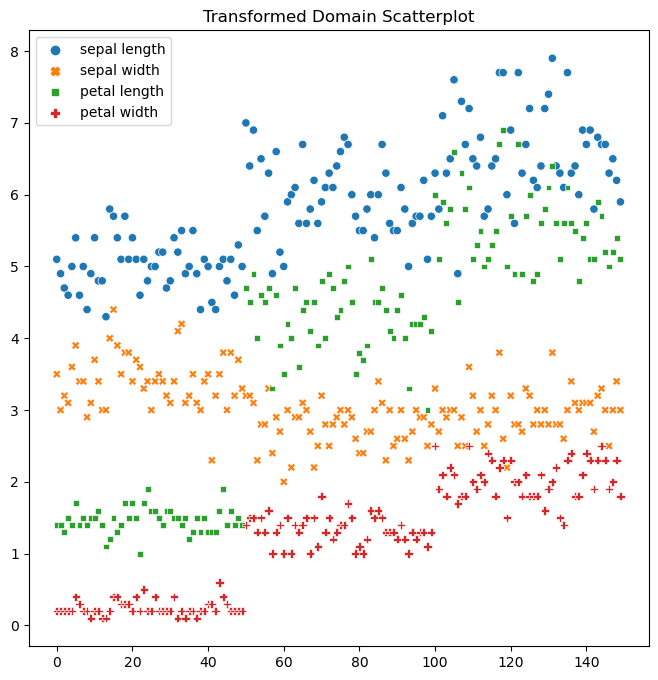

In [118]:
fig = plt.figure(figsize = (8,8))
sns.scatterplot(df)
plt.title("Transformed Domain Scatterplot")
plt.legend()